In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2934431715797256378, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2814792113717517465
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11538584393957791541
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15695549568
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6260619023018135454
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [4]:
!cat /proc/meminfo

MemTotal:       13333552 kB
MemFree:         9458916 kB
MemAvailable:   11944340 kB
Buffers:           80044 kB
Cached:          2418624 kB
SwapCached:            0 kB
Active:          1124484 kB
Inactive:        2335948 kB
Active(anon):     789200 kB
Inactive(anon):     8548 kB
Active(file):     335284 kB
Inactive(file):  2327400 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               584 kB
Writeback:             0 kB
AnonPages:        961696 kB
Mapped:           580988 kB
Shmem:              9168 kB
Slab:             174672 kB
SReclaimable:     127144 kB
SUnreclaim:        47528 kB
KernelStack:        4796 kB
PageTables:         8764 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    3632848 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              952 kB
AnonHugePages:   

In [6]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [8]:
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pip install -q keras

In [12]:
import pandas as pd
import tensorflow as tf
import numpy as np
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/churn_modelling.csv")

In [13]:
X = data.iloc[:,3:13]
y = data.iloc[:,-1]
geography = pd.get_dummies(X["Geography"])

gender = pd.get_dummies(X["Gender"])

X.drop(["Geography","Gender"],axis=1,inplace=True)

X = pd.concat([X,geography,gender],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras
model = keras.models.Sequential()

model.add(keras.layers.Dense(32,activation="relu",kernel_initializer="he_normal",input_shape=(13,)))

model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(16,activation="relu",kernel_initializer="he_normal"))

model.add(keras.layers.Dense(1,activation="sigmoid",kernel_initializer="glorot_uniform"))

model.compile(optimizer = "adam",loss='binary_crossentropy',metrics=["accuracy"])

history = model.fit(X_train,y_train,batch_size=32,validation_split=0.3,verbose=1,epochs=100)

In [17]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [18]:
from sklearn.metrics import accuracy_score,recall_score,f1_score

print("Accuracy",accuracy_score(y_test,y_pred))

print("F1 score",f1_score(y_test,y_pred))

print("Recall",recall_score(y_test,y_pred))

Accuracy 0.8625
F1 score 0.5852187028657617
Recall 0.47901234567901235


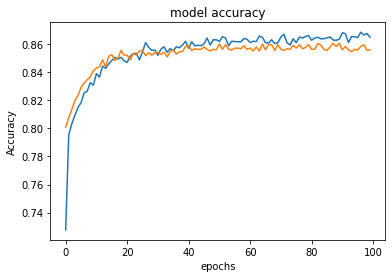

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()